   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


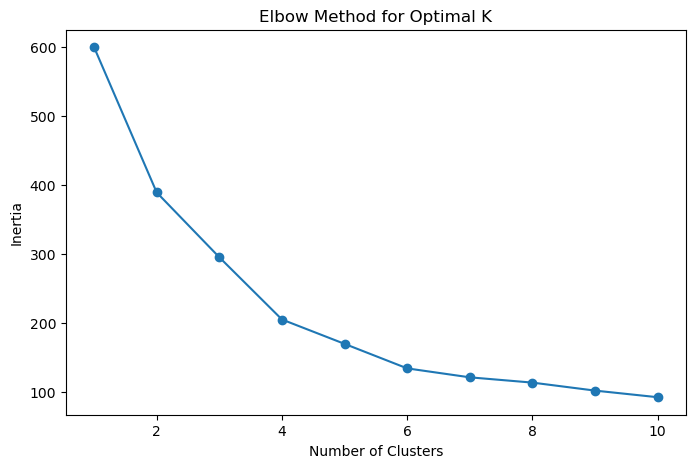

Cluster Centers:
[[ 0.82935381 -0.00348296 -0.65438593]
 [-0.43033758  1.02223317  1.15593564]
 [-0.98371627 -0.65995549  0.24488394]]


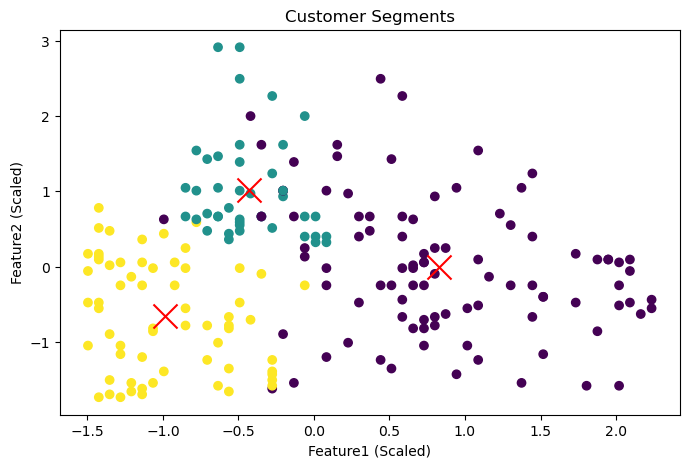

Clustered data saved to clustered_data.csv


In [9]:

import os
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Suppress warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Set OMP_NUM_THREADS to avoid memory leak
os.environ["OMP_NUM_THREADS"] = "1"

# Load the dataset
file_path = "C:/Users/akshi/Downloads/Mall_Customers.csv"  # Replace with the actual path to your CSV file
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
print(data.head())
print(data.columns)

# Selecting relevant features for clustering
# Replace with actual column names related to purchase history, e.g., 'Annual Income', 'Spending Score', etc.
features = ['Age','Annual Income (k$)' , 'Spending Score (1-100)']  # Replace with your dataset's columns
X = data[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Create the K-means model with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Visualize the clusters (for 2D data)
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title('Customer Segments')
plt.xlabel('Feature1 (Scaled)')
plt.ylabel('Feature2 (Scaled)')
plt.show()

# Save the data with cluster labels
output_file = 'clustered_data.csv'
data.to_csv(output_file, index=False)
print(f"Clustered data saved to {output_file}")
